In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import models to use from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [85]:
from sklearn.preprocessing import RobustScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV

# decision tree, logistic
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegressionCV

# clustering analysis
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import jaccard_score, adjusted_rand_score, silhouette_score, calinski_harabasz_score, roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics.cluster import contingency_matrix

# ensemble methods, MLP
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

In [8]:
read = pd.read_csv('laptop_convertion.csv',encoding='latin1')

In [9]:
df = pd.read_csv('laptop_price.csv',encoding='latin1')

In [11]:
df

laptop_ID Company                              Product  \
0             1   Apple                          MacBook Pro   
1             2   Apple                          Macbook Air   
2             3      HP                               250 G6   
3             4   Apple                          MacBook Pro   
4             5   Apple                          MacBook Pro   
...         ...     ...                                  ...   
1298       1316  Lenovo                       Yoga 500-14ISK   
1299       1317  Lenovo                       Yoga 900-13ISK   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302       1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3                                    1440x900   
2               Notebook    15.6                           Full HD 1920x1080   
3              Ultrabook    15.4          IPS Panel Retina Display 2880x1800   
4              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
...                  ...     ...                                         ...   
1298  2 in 1 Convertible    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299  2 in 1 Convertible    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300            Notebook    14.0                                    1366x768   
1301            Notebook    15.6                                    1366x768   
1302            Notebook    15.6                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight  Price_euros  
0     Intel Iris Plus Graphics 640       macOS  1.37kg      1339.69  
1           Intel HD Graphics 6000       macOS  1.34kg       898.94  
2            Intel HD Graphics 620       No OS  1.86kg       575.00  
3               AMD Radeon Pro 455       macOS  1.83kg      2537.45  
4     Intel Iris Plus Graphics 650       macOS  1.37kg      1803.60  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg       638.00  
1299         Intel HD Graphics 520  Windows 10   1.3kg      1499.00  
1300             Intel HD Graphics  Windows 10   1.5kg       229.00  
1301            AMD Radeon R5 M330  Windows 10  2.19kg       764.00  
1302             Intel HD Graphics  Windows 10   2.2kg       369.00  

[1303 rows x 13 columns]

In [10]:
read

laptop_ID  Company  Product  TypeName  Inches  ScreenResolution  Cpu  \
0             1        0        0         0    13.3                 0    0   
1             2        0        1         0    13.3                 1    1   
2             3        1        2         1    15.6                 2    2   
3             4        0        0         0    15.4                 3    3   
4             5        0        0         0    13.3                 0    4   
...         ...      ...      ...       ...     ...               ...  ...   
1298       1316        5      615         4    14.0                 7   44   
1299       1317        5      404         4    13.3                30   44   
1300       1318        5      342         1    14.0                 4   85   
1301       1319        1      616         1    15.6                 4   44   
1302       1320        3      617         1    15.6                 4   85   

      Ram  Memory  Gpu  OpSys  Weight  Price_euros  
0       8       0    0      0    1.37      1339.69  
1       8       1    1      0    1.34       898.94  
2       8       2    2      1    1.86       575.00  
3      16       3    3      0    1.83      2537.45  
4       8       2    4      0    1.37      1803.60  
...   ...     ...  ...    ...     ...          ...  
1298    4       0    9      2    1.80       638.00  
1299   16       3    9      2    1.30      1499.00  
1300    2      10   20      2    1.50       229.00  
1301    6       6  101      2    2.19       764.00  
1302    4       4   20      2    2.20       369.00  

[1303 rows x 13 columns]

In [12]:
read.describe()

laptop_ID      Company      Product     TypeName       Inches  \
count  1303.000000  1303.000000  1303.000000  1303.000000  1303.000000   
mean    660.155794     3.907905   226.958557     1.551036    15.017191   
std     381.172104     2.751755   184.403334     1.299402     1.426304   
min       1.000000     0.000000     0.000000     0.000000    10.100000   
25%     331.500000     2.000000    63.500000     1.000000    14.000000   
50%     659.000000     4.000000   185.000000     1.000000    15.600000   
75%     990.500000     5.000000   368.500000     3.000000    15.600000   
max    1320.000000    18.000000   617.000000     5.000000    18.400000   

       ScreenResolution          Cpu          Ram       Memory          Gpu  \
count       1303.000000  1303.000000  1303.000000  1303.000000  1303.000000   
mean           5.669225    28.072909     8.382195     5.493477    20.960092   
std            6.254610    26.297834     5.084665     5.305252    22.133375   
min            0.000000     0.000000     2.000000     0.000000     0.000000   
25%            2.000000     8.000000     4.000000     2.000000     8.000000   
50%            4.000000    23.000000     8.000000     4.000000    14.000000   
75%            5.000000    44.000000     8.000000     7.000000    29.000000   
max           39.000000   117.000000    64.000000    38.000000   109.000000   

             OpSys       Weight  Price_euros  
count  1303.000000  1303.000000  1303.000000  
mean      2.370683     2.038734  1123.686992  
std       1.422866     0.665475   699.009043  
min       0.000000     0.690000   174.000000  
25%       2.000000     1.500000   599.000000  
50%       2.000000     2.040000   977.000000  
75%       2.000000     2.300000  1487.880000  
max       8.000000     4.700000  6099.000000

In [7]:
read.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   int64  
 2   Product           1303 non-null   int64  
 3   TypeName          1303 non-null   int64  
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   int64  
 6   Cpu               1303 non-null   int64  
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   int64  
 9   Gpu               1303 non-null   int64  
 10  OpSys             1303 non-null   int64  
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 142.5 KB


In [13]:
Company=read['Company'].unique()
for i in range(len(Company)):
    read=read.replace(Company[i],i)
print(i)

18


In [14]:
read['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [15]:
read=read.replace(to_replace='8GB',value='8')
read=read.replace(to_replace='16GB',value='16')
read=read.replace(to_replace='4GB',value='4')
read=read.replace(to_replace='2GB',value='2')
read=read.replace(to_replace='12GB',value='12')
read=read.replace(to_replace='6GB',value='6')
read=read.replace(to_replace='32GB',value='32')
read=read.replace(to_replace='64GB',value='64')
read=read.replace(to_replace='24GB',value='24')

In [16]:
read

laptop_ID  Company  Product  TypeName  Inches  ScreenResolution  Cpu  \
0             1        0        0         0    13.3                 0    0   
1             2        0        1         0    13.3                 1    1   
2             3        1        2         1    15.6                 2    2   
3             4        0        0         0    15.4                 3    3   
4             5        0        0         0    13.3                 0    4   
...         ...      ...      ...       ...     ...               ...  ...   
1298       1316        5      615         4    14.0                 7   44   
1299       1317        5      404         4    13.3                30   44   
1300       1318        5      342         1    14.0                 4   85   
1301       1319        1      616         1    15.6                 4   44   
1302       1320        3      617         1    15.6                 4   85   

      Ram  Memory  Gpu  OpSys  Weight  Price_euros  
0       8       0    0      0    1.37      1339.69  
1       8       1    1      0    1.34       898.94  
2       8       2    2      1    1.86       575.00  
3      16       3    3      0    1.83      2537.45  
4       8       2    4      0    1.37      1803.60  
...   ...     ...  ...    ...     ...          ...  
1298    4       0    9      2    1.80       638.00  
1299   16       3    9      2    1.30      1499.00  
1300    2      10   20      2    1.50       229.00  
1301    6       6  101      2    2.19       764.00  
1302    4       4   20      2    2.20       369.00  

[1303 rows x 13 columns]

In [17]:
read['Product'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
product=read['Product'].unique()
for i in range(len(product)):
    read=read.replace(product[i],i)
print(i)

617


In [19]:
TypeName=read['TypeName'].unique()
for i in range(len(TypeName)):
    read=read.replace(TypeName[i],i)

In [20]:
ScreenResolution=read['ScreenResolution'].unique()
for i in range(len(ScreenResolution)):
    read=read.replace(ScreenResolution[i],i)

In [21]:
read

laptop_ID  Company  Product  TypeName  Inches  ScreenResolution  Cpu  \
0             1        0        0         0    13.3                 0    0   
1             2        0        1         0    13.3                 1    1   
2             3        1        2         1    15.6                 2    2   
3             4        0        0         0    15.4                 3    3   
4             5        0        0         0    13.3                 0    4   
...         ...      ...      ...       ...     ...               ...  ...   
1298       1316        5      615         4    14.0                 7   44   
1299       1317        5      404         4    13.3                30   44   
1300       1318        5      342         1    14.0                 4   85   
1301       1319        1      616         1    15.6                 4   44   
1302       1320        3      617         1    15.6                 4   85   

      Ram  Memory  Gpu  OpSys  Weight  Price_euros  
0       8       0    0      0    1.37      1339.69  
1       8       1    1      0    1.34       898.94  
2       8       2    2      1    1.86       575.00  
3      16       3    3      0    1.83      2537.45  
4       8       2    4      0    1.37      1803.60  
...   ...     ...  ...    ...     ...          ...  
1298    4       0    9      2    1.80       638.00  
1299   16       3    9      2    1.30      1499.00  
1300    2      10   20      2    1.50       229.00  
1301    6       6  101      2    2.19       764.00  
1302    4       4   20      2    2.20       369.00  

[1303 rows x 13 columns]

In [22]:
Cpu=read['Cpu'].unique()
for i in range(len(Cpu)):
    read=read.replace(Cpu[i],i)

In [23]:
Memory=read['Memory'].unique()
for i in range(len(Memory)):
    read=read.replace(Memory[i],i)

In [24]:
Gpu=read['Gpu'].unique()
for i in range(len(Gpu)):
    read=read.replace(Gpu[i],i)

In [25]:
OpSys=read['OpSys'].unique()
for i in range(len(OpSys)):
    read=read.replace(OpSys[i],i)

In [27]:
read

laptop_ID  Company  Product  TypeName  Inches  ScreenResolution  Cpu  \
0             1        0        0         0    13.3                 0    0   
1             2        0        1         0    13.3                 1    1   
2             3        1        2         1    15.6                 2    2   
3             4        0        0         0    15.4                 3    3   
4             5        0        0         0    13.3                 0    4   
...         ...      ...      ...       ...     ...               ...  ...   
1298       1316        5      615         4    14.0                 7   44   
1299       1317        5      404         4    13.3                30   44   
1300       1318        5      342         1    14.0                 4   85   
1301       1319        1      616         1    15.6                 4   44   
1302       1320        3      617         1    15.6                 4   85   

      Ram  Memory  Gpu  OpSys  Weight  Price_euros  
0       8       0    0      0    1.37      1339.69  
1       8       1    1      0    1.34       898.94  
2       8       2    2      1    1.86       575.00  
3      16       3    3      0    1.83      2537.45  
4       8       2    4      0    1.37      1803.60  
...   ...     ...  ...    ...     ...          ...  
1298    4       0    9      2    1.80       638.00  
1299   16       3    9      2    1.30      1499.00  
1300    2      10   20      2    1.50       229.00  
1301    6       6  101      2    2.19       764.00  
1302    4       4   20      2    2.20       369.00  

[1303 rows x 13 columns]

In [28]:
read=read.drop(columns='laptop_ID')

In [29]:
read

Company  Product  TypeName  Inches  ScreenResolution  Cpu  Ram  Memory  \
0           0        0         0    13.3                 0    0    8       0   
1           0        1         0    13.3                 1    1    8       1   
2           1        2         1    15.6                 2    2    8       2   
3           0        0         0    15.4                 3    3   16       3   
4           0        0         0    13.3                 0    4    8       2   
...       ...      ...       ...     ...               ...  ...  ...     ...   
1298        5      615         4    14.0                 7   44    4       0   
1299        5      404         4    13.3                30   44   16       3   
1300        5      342         1    14.0                 4   85    2      10   
1301        1      616         1    15.6                 4   44    6       6   
1302        3      617         1    15.6                 4   85    4       4   

      Gpu  OpSys  Weight  Price_euros  
0       0      0    1.37      1339.69  
1       1      0    1.34       898.94  
2       2      1    1.86       575.00  
3       3      0    1.83      2537.45  
4       4      0    1.37      1803.60  
...   ...    ...     ...          ...  
1298    9      2    1.80       638.00  
1299    9      2    1.30      1499.00  
1300   20      2    1.50       229.00  
1301  101      2    2.19       764.00  
1302   20      2    2.20       369.00  

[1303 rows x 12 columns]

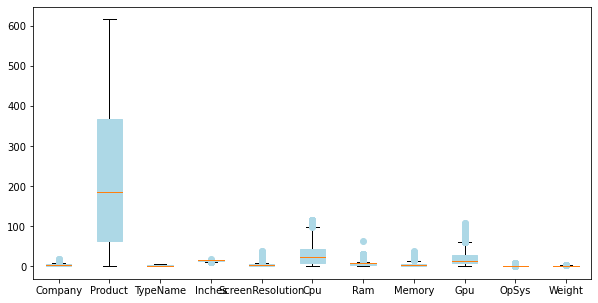

<AxesSubplot:>

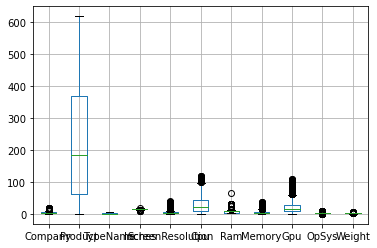

In [60]:
df_subset = read[['Company','Product','TypeName','Inches','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys','Weight']]
flierprops = dict(markerfacecolor='lightblue', marker='o',markeredgecolor='lightblue') 
# <=> rs = {'markerfacecolor'='lightblue', 'marker'='o'}
boxprops = dict(facecolor='lightblue',color = 'lightblue') # color: box line color; facecolor: fill-in color
plt.figure(figsize=(10, 5))
plt.boxplot(df_subset.values,labels=df_subset.columns,
           flierprops=flierprops,boxprops=boxprops,
            patch_artist=True)
plt.show()
df_subset.boxplot()

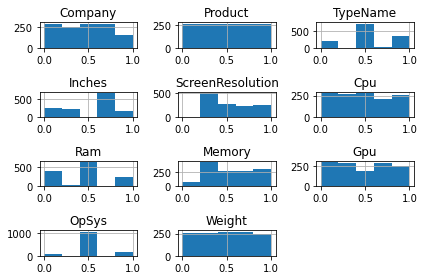

In [62]:
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(random_state=0)
x_trains = quantile_transformer.fit_transform(df_subset)
pd.DataFrame(x_trains, columns=df_subset.columns).hist(bins = 5)
plt.tight_layout()

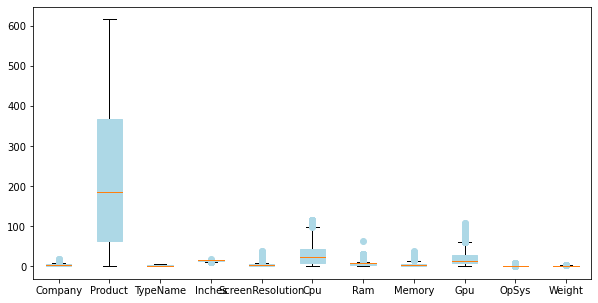

In [63]:
flierprops = dict(markerfacecolor='lightblue', marker='o',markeredgecolor='lightblue') 
# <=> rs = {'markerfacecolor'='lightblue', 'marker'='o'}
boxprops = dict(facecolor='lightblue',color = 'lightblue') # color: box line color; facecolor: fill-in color
plt.figure(figsize=(10, 5))
plt.boxplot(df_subset.values,labels=df_subset.columns,
           flierprops=flierprops,boxprops=boxprops,
            patch_artist=True)
plt.show()

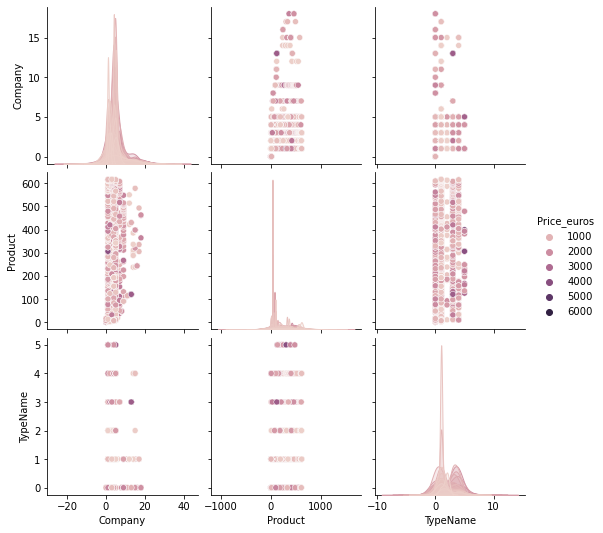

In [80]:
sns.pairplot(read, vars = ['Company','Product','TypeName'], hue = 'Price_euros')
plt.show()

<AxesSubplot:>

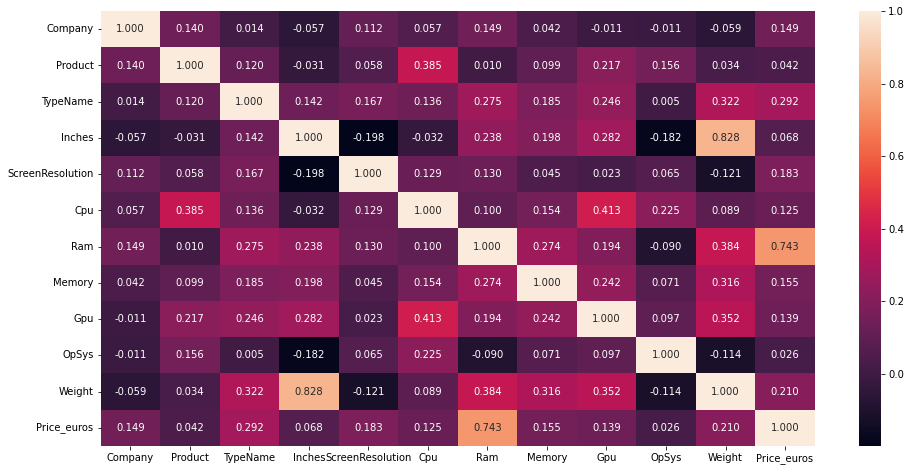

In [81]:
plt.figure(figsize=(16, 8))
sns.heatmap(read.corr(), annot=True, fmt='.3f')

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 8017)

# RobustScaler ALL variables
scaler = RobustScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)

pd.options.display.float_format = '{:,.4f}'.format
display(x_train.head(5))
display(x_train.describe())

Company  Product  TypeName  Inches  ScreenResolution     Cpu     Ram  \
118   -0.3333  -0.3269    0.0000  1.0625           -0.6667 -0.3333 -1.0000   
441    0.0000  -0.5275    0.0000  0.0000           -0.6667 -0.3611 -1.0000   
1295   0.0000  -0.5599    0.0000  0.0000            0.0000 -0.2500  0.0000   
1115   0.0000  -0.5502   -0.5000 -1.4375           -0.6667  0.3333  0.0000   
36    -0.6667  -0.5696    0.0000  0.0000            0.0000  0.0833 -1.0000   

      Memory     Gpu  OpSys  Weight  
118   0.4000  0.5909 0.0000  0.0000  
441  -0.4000  0.1818 0.0000  0.2500  
1295  0.4000 -0.1364 2.0000  0.3750  
1115 -0.4000 -0.6364 0.0000 -0.9625  
36    0.4000 -0.5455 2.0000  0.1250

Company  Product  TypeName   Inches  ScreenResolution      Cpu  \
count 781.0000 781.0000  781.0000 781.0000          781.0000 781.0000   
mean   -0.0563   0.1464    0.2746  -0.3826            0.5783   0.1953   
std     0.8941   0.6044    0.6562   0.8854            1.9877   0.7291   
min    -1.3333  -0.5793   -0.5000  -3.4375           -1.3333  -0.5833   
25%    -0.6667  -0.3883    0.0000  -1.0000           -0.6667  -0.3611   
50%     0.0000   0.0000    0.0000   0.0000            0.0000   0.0000   
75%     0.3333   0.6117    1.0000   0.0000            0.3333   0.6389   
max     4.6667   1.4175    2.0000   1.0625           11.0000   2.6667   

           Ram   Memory      Gpu    OpSys   Weight  
count 781.0000 781.0000 781.0000 781.0000 781.0000  
mean    0.0743   0.2684   0.3169   0.3649   0.0236  
std     1.2675   1.0060   1.0029   1.4092   0.8161  
min    -1.5000  -0.8000  -0.6364  -2.0000  -1.6375  
25%    -1.0000  -0.4000  -0.3182   0.0000  -0.6250  
50%     0.0000   0.0000   0.0000   0.0000   0.0000  
75%     0.0000   0.6000   0.6818   0.0000   0.3750  
max    14.0000   6.6000   4.1818   6.0000   3.2500

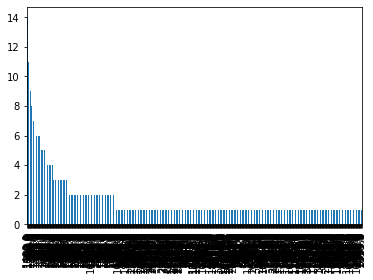

In [88]:
read['Price_euros'].value_counts().plot(kind = 'bar');

<AxesSubplot:>

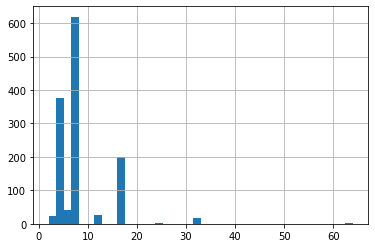

In [89]:
read['Ram'].T.hist(bins = 40)

<AxesSubplot:>

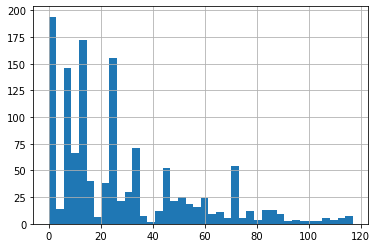

In [92]:
read['Cpu'].T.hist(bins = 40)

<AxesSubplot:>

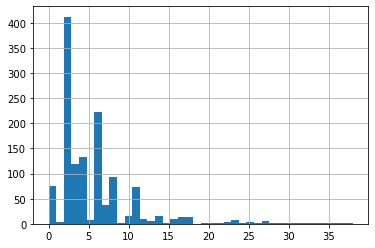

In [93]:
read['Memory'].T.hist(bins = 40)

<AxesSubplot:>

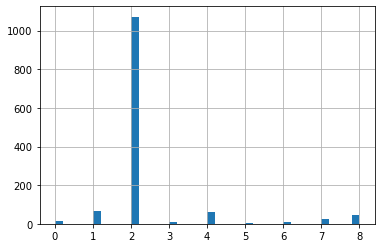

In [94]:
read['OpSys'].T.hist(bins = 40)

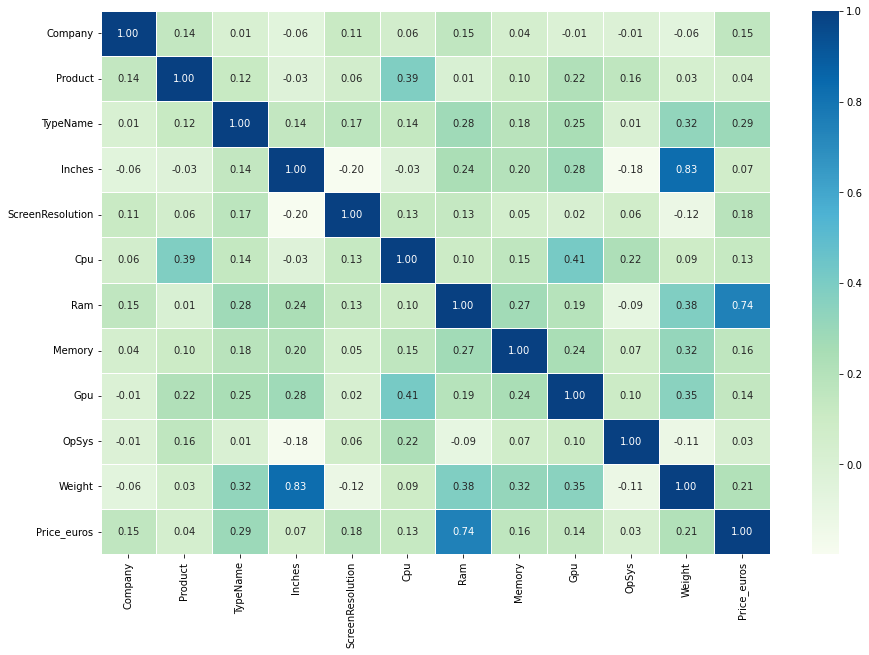

In [95]:
corr_matrix = read.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(
    corr_matrix, 
    annot = True, 
    linewidths = 0.5,
    fmt = '0.2f', 
    cmap = 'GnBu'
)

In [2]:
import seaborn as sns
correl = read.corr()
cmap = sns.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(correl, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (16, 12))

sns.heatmap(correl, mask = mask, cmap = cmap, vmax = 0.3, center = 0,annot = True, square = True, linewidths = 0.5, cbar_kws = {"shrink": .5});

NameError: name 'read' is not defined

In [30]:
features =['Company','Product','TypeName','Inches','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys','Weight']

In [31]:
x=read[features]

In [34]:
y=read.iloc[:,11:]

In [35]:
y

Price_euros
0         1339.69
1          898.94
2          575.00
3         2537.45
4         1803.60
...           ...
1298       638.00
1299      1499.00
1300       229.00
1301       764.00
1302       369.00

[1303 rows x 1 columns]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
y_predict=lr.predict(x_test)

In [45]:
r2=r2_score(y_test,lr.predict(x_test))
print(r2)

0.6321406434868193


# dession Tree

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [57]:

model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

print(model.score(x_test, y_test))

0.7063295604331159


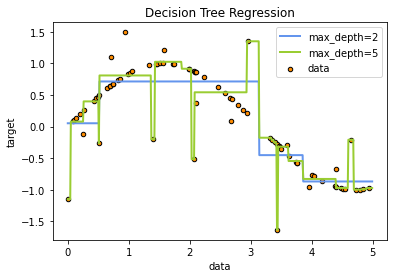

In [97]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()